<a href="https://colab.research.google.com/github/wesley-wms/reconhecimento-facial/blob/main/ReconhecimentoFacial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow opencv-python matplotlib

In [2]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Carregar o modelo Haar Cascade para detecção de faces
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [4]:
# Exemplo de um modelo de classificação de faces (substitua pelo seu modelo)
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')  # 10 classes de faces
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


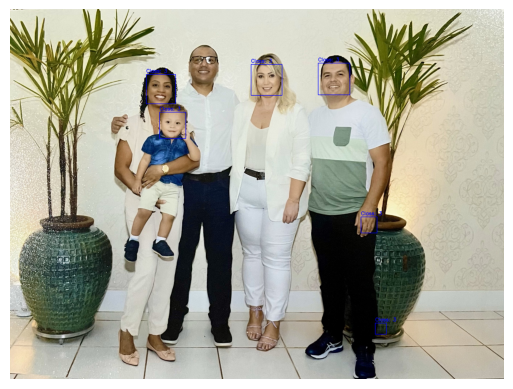

In [5]:
# Carregar a imagem
image_path = '/content/drive/MyDrive/IMG_6265.jpg'
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detectar faces
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Para cada face detectada
for (x, y, w, h) in faces:
    # Extrair a região da face
    face = image[y:y+h, x:x+w]

    # Redimensionar a face para o tamanho esperado pelo modelo de classificação
    resized_face = cv2.resize(face, (150, 150))
    resized_face = np.expand_dims(resized_face, axis=0)

    # Fazer a previsão
    predictions = model.predict(resized_face)
    predicted_class = np.argmax(predictions)

    # Desenhar um retângulo ao redor da face e mostrar a classe prevista
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)
    cv2.putText(image, f'Class: {predicted_class}', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

# Mostrar a imagem com as detecções
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()